<h3>Prerequisite for Collab</h3>

In [1]:
!pip install pyomo

In [2]:
!pip install highspy

In [3]:
!pip install pyscipopt

In [4]:
#!pip install maingopy

In [5]:
!pip install shapely

<h3>Prerequisite for Conda Installation</h3>

In [6]:
#On Mac Terminal: conda create -n optim_env python=3.10
#conda activate optim_env
#conda install -c conda-forge pyomo scip
#conda install -c conda-forge glpk     # Linear / MILP solver
#conda install -c conda-forge highs    # Linear / Quadratic solver
#conda install -c conda-forge ipopt    # Nonlinear solver
#conda install -c conda-forge scip     # MINLP solver
#conda install networkx
#conda install conda-forge::matplotlib

# **I. Network Analysis**

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import time

# Step 1: Create graph
G2 = nx.Graph()

# Step 2: Define node data with BOTH position and label
# Each entry: node_id: {"pos": (x, y), "label": "..."}
node_data = {
    1:  {"pos": (-4.559058, 15.174809), "label": "Route de Matadi (border Kinshasa)"},
    2:  {"pos": (-4.442848, 15.255100), "label": "Triangle Matadi Kibala"},
    3:  {"pos": (-4.406924, 15.256513), "label": "UPN"},
    4:  {"pos": (-4.349325, 15.238810), "label": "Av. de l'École – Binza"},
    5:  {"pos": (-4.328773, 15.252333), "label": "Mont Ngaliema"},
    6:  {"pos": (-4.310907, 15.288488), "label": "Bd du 30 Juin"},
    7:  {"pos": (-4.299709, 15.319240), "label": "Gare Centrale"},
    8:  {"pos": (-4.398246, 15.276497), "label": "Selembao (Auto Stop)"},
    9:  {"pos": (-4.381511, 15.282728), "label": "Sanatorium"},
    10: {"pos": (-4.337062, 15.295951), "label": "Pierre Mulele"},
    11: {"pos": (-4.395099, 15.307741), "label": "Triangle Campus"},
    12: {"pos": (-4.389760, 15.314763), "label": "Rond Point Ngaba"},
    13: {"pos": (-4.336819, 15.326397), "label": "Av. de l'Université"},
    14: {"pos": (-4.331834, 15.314427), "label": "Bd Triomphal"},
    15: {"pos": (-4.393572, 15.333011), "label": "Lemba"},
    16: {"pos": (-4.375441, 15.344869), "label": "Échangeur 1"},
    17: {"pos": (-4.397829, 15.393514), "label": "Masina"},
    18: {"pos": (-4.405498, 15.423430), "label": "Av. Ndjoku"},
    19: {"pos": (-4.391380, 15.446782), "label": "Aéroport Ndjili"},
    20: {"pos": (-4.384103, 15.470908), "label": "Nsele"},
    21: {"pos": (-4.209434, 15.578420), "label": "RP Nsele"},
    22: {"pos": (-4.202280, 15.613246), "label": "Menkao"},
    23: {"pos": (-4.051282, 15.558907), "label": "Maluku"},
    # 23 intentionally omitted
    24: {"pos": (-4.472585, 15.281341), "label": "Arrêt Gare"},
    25: {"pos": (-4.420154, 15.307442), "label": "UNIKIN"},
    26: {"pos": (-4.461385, 15.288240), "label": "Kimwenza 2"},
    27: {"pos": (-4.484759, 15.219752), "label": "Benseke"},
    28: {"pos": (-4.447334, 15.249644), "label": "Wenze Matadi Kibala"},
    29: {"pos": (-4.329183, 15.337959), "label": "Limete PL"},
    30: {"pos": (-4.353936, 15.335540), "label": "Limete R"},
    
}

# Step 3: Add nodes with attributes
for node, attrs in node_data.items():
    G2.add_node(node, **attrs)  # adds both 'pos' and 'label'

# Step 4: Define edges with names
edges = [
    (1, 27, {"name": "Route de Matadi - Benseke"}),
    (27, 28, {"name": "Benseke - Wenze Matadi Kibala"}),
    (28, 2, {"name": "Wenze (Matadi Kibala) - Triangle (Cité Verte)"}),
    (2, 3, {"name": "Matadi Kibala - UPN"}),
    (3, 4, {"name": "UPN - Binza"}),
    (4, 5, {"name": "Binza - Mont Ngaliema"}),
    (5, 6, {"name": "Boulevard du 30 Juin"}),
    (6, 7, {"name": "24 - Gare Centrale"}),
    (3, 8, {"name": "UPN - Selembao"}),
    (8, 9, {"name": "Sanatorium - Université"}),
    (9, 10, {"name": "Sanatorium - Pierre Mulele"}),
    (10, 6, {"name": "24 Novembre"}),
    (2, 11, {"name": "Triangle (Cité Verte) - Triangle (Campus)"}),
    (11, 12, {"name": "Tr.Campus - RP Ngaba"}),
    (12, 13, {"name": "Av. Université"}),
    (10, 14, {"name": "B. Triomphal"}),
    (13, 14, {"name": "B. Sendwe"}),
    (12, 15, {"name": "RP Ngaba - Lemba"}),
    (15, 16, {"name": "Lemba - Echangeur 1"}),
    (13, 30, {"name": "Sendwe - Limete"}),
    (30, 16, {"name": "Limete. Lumumba 1"}),
    (16, 17, {"name": "Echangeur - Masina"}),
    (17, 18, {"name": "Masina - Av.Ndjoku (B.Lumumba 2)"}),
    (18, 19, {"name": "Av.Ndjoku - Int Aeroport (B.Lumumba 3)"}),#
    (19, 20, {"name": "Aeroport - Nsele"}),#
    (20, 21, {"name": "Nsele - RP. Nsele"}),#
    (21, 22, {"name": "RP.Nsele - Menkao"}),#
    (21, 23, {"name": "RP.Nsele - Maluku"}),#
    (2, 24, {"name": "Triangle Cité Verte - R. Kimwenza"}),#
    (11, 25, {"name": "Triangle Campus - Unikin"}),#
    (12, 25, {"name": "RP Ngaba - Unikin"}),#
    (25, 26, {"name": "Unikin - Kimwenza 2"}),#
    (7, 29, {"name": "Gare Centrale - Poids Lourd"}),#
    (29, 16, {"name": "Poids Lourd - Echangeur"}),#
]
G2.add_edges_from(edges)
G0 = G2.copy()

In [8]:
#(Distance) Calibration -------------------------------------
P1 = node_data[3]['pos']
P2 = node_data[27]['pos']
d = math.sqrt((P1[0]-P2[0])**2 + (P1[1]-P2[1])**2 )
True_d  = 4.2
calibration_score = d/True_d
print(d,calibration_score)
# ----------------------------------------------------------
# Edge lengths (Euclidean from node positions)
# ----------------------------------------------------------
def compute_edge_lengths(G):
    #pos = nx.get_node_attributes(G, 'pos')
    lengths = {}
    for (u, v) in G.edges(): 
        x1, y1 = node_data[u]['pos']
        x2, y2 = node_data[v]['pos']
        lengths[(u, v)] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return lengths

0.08607937236063044 0.02049508865729296


<h3>Problem Configuration</h3>

In [9]:
from joblib import load

demand_dict = load("../../data/od_demand.joblib")
print("Loaded", len(demand_dict), "OD pairs.")


Loaded 114 OD pairs.


In [10]:
#----- Complete Graph
Gc = nx.complete_graph(G0.nodes()) #complete graph
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
complete_edge_list = Gs.edges()
#---- System Configuration ----------------------
lengths = compute_edge_lengths(Gc)
cost_weights = {(i,j): lengths[i,j] for (i,j) in Gc.edges()}
CALIB = calibration_score
#-------- Demand Data ---------------------------
OD_pairs = demand_dict.keys() #[(1,27),(16,18),(5,7),(10,13)] #Origin Destination Pairs
demand_paths = demand_dict# {(1,27):25, (16,18):15, (5,7):15, (10,13):18}
Budget = 100 #100 Km
v_avg = 40;
travel_t0 = {(i,j):(cost_weights[i,j]/calibration_score)/v_avg for (i,j) in Gc.edges()}
travel_alpha = {(i,j):0.15 for (i,j) in Gc.edges()}
optim_free_design = False
#Optimisation settings
penalty_factor = 1e9
optim_max_iter = 1
optim_pop_size = 5
optim_stall_iter = optim_max_iter*optim_pop_size
#ACO
aco_alpha = 2.0
aco_beta = 2.0
aco_rho = 0.5
aco_Q = 100
#Number of runs
n_runs = 1

<h3>Analysis</h3>

In [11]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def draw_rotated_graph(
    G,
    degrees=-90,
    figsize=(10, 8),
    invert_x=True,
    edge_flows=None,
    scale=1/200,
    show_labels=True,
    node_size=120,
    spread=2.0,
    label_pos=0.55,
    node_font_size=6,
    edge_font_size=6
):

    def rotate_pos(pos_dict, degrees):
        theta = math.radians(degrees)
        cos_t, sin_t = math.cos(theta), math.sin(theta)
        return {
            n: (x * cos_t + y * sin_t, -x * sin_t + y * cos_t)
            for n, (x, y) in pos_dict.items()
        }

    # Get positions
    pos = nx.get_node_attributes(G, 'pos')
    if not pos:
        pos = nx.spring_layout(G, seed=42, k=1.0)

    pos_rotated = rotate_pos(pos, degrees)
    pos_scaled = {n: (x*spread, y*spread) for n, (x,y) in pos_rotated.items()}

    # Edge widths
    edge_widths = []
    for (u,v) in G.edges():
        flow = 0.0
        if edge_flows:
            flow = edge_flows.get((u, v), edge_flows.get((v, u), 0.0))
        edge_widths.append(max(0.5, flow * scale))

    # Edge color normalization
    edge_values = []
    if edge_flows:
        flow_vals = [
            edge_flows.get((u,v), edge_flows.get((v,u), 0.0))
            for (u,v) in G.edges()
        ]
        f_min, f_max = min(flow_vals), max(flow_vals)

        for (u,v) in G.edges():
            f = edge_flows.get((u,v), edge_flows.get((v,u), 0.0))
            norm_f = (f - f_min) / (f_max - f_min) if f_max > f_min else 0.0
            edge_values.append(norm_f)
    else:
        edge_values = "grey"

    # Plot
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos_scaled, node_size=node_size, node_color="lightblue")
    nx.draw_networkx_labels(G, pos_scaled, font_size=node_font_size, font_weight="bold")

    nx.draw_networkx_edges(
        G,
        pos_scaled,
        width=edge_widths,
        edge_color=edge_values,
        edge_cmap=plt.cm.RdYlGn_r,  # green=low, red=high
        arrows=G.is_directed()
    )

    if edge_flows and show_labels:
        edge_labels = {
            (u,v): f"{edge_flows.get((u,v), edge_flows.get((v,u), 0.0)):.2f}"
            for (u,v) in G.edges()
        }
        nx.draw_networkx_edge_labels(
            G,
            pos_scaled,
            edge_labels=edge_labels,
            font_size=edge_font_size,
            label_pos=label_pos,
            font_color="brown"
        )

    if invert_x:
        plt.gca().invert_xaxis()

    plt.axis("off")
    plt.show()


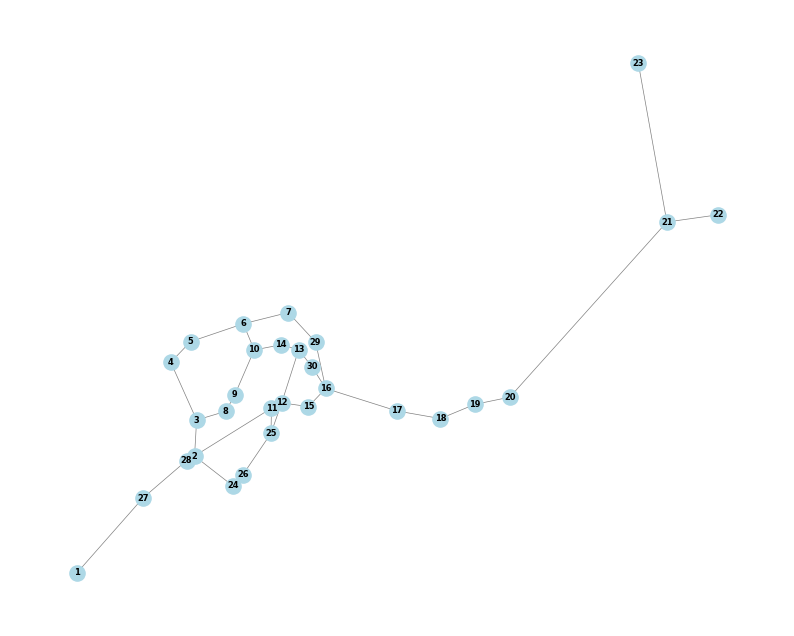

In [12]:
draw_rotated_graph(G2)

In [13]:
#Optimisation Preparation
import networkx as nx
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
print('[0] Initial Network:',G0, '\n[1] Complete Network:', Gc,'\n[2] Solution Network:',Gs)
#candidate solution
Gi = G0
def get_simple_paths(Gi, r, s):
  return list(nx.all_simple_paths(Gi,source=r,target=s))

[0] Initial Network: Graph with 30 nodes and 34 edges 
[1] Complete Network: Graph with 30 nodes and 435 edges 
[2] Solution Network: Graph with 30 nodes and 401 edges


In [14]:
def interior_intersection(A, B, C, D, eps=1e-9):
    r = (B[0]-A[0], B[1]-A[1])
    s = (D[0]-C[0], D[1]-C[1])
    AC = (C[0]-A[0], C[1]-A[1])

    rxs = r[0]*s[1] - r[1]*s[0]
    if abs(rxs) < eps:
        return False  # parallel or collinear

    t = (AC[0]*s[1] - AC[1]*s[0]) / rxs
    u = (AC[0]*r[1] - AC[1]*r[0]) / rxs

    # STRICT interior only
    return (eps < t < 1-eps) and (eps < u < 1-eps)


def count_intersections_basic(G, pos):
    edges = list(G.edges())
    n = len(edges)

    intersections = []
    count = 0

    for i in range(n):
        u1, v1 = edges[i]
        A = pos[u1]['pos']; B = pos[v1]['pos']

        for j in range(i+1, n):
            u2, v2 = edges[j]
            C = pos[u2]['pos']; D = pos[v2]['pos']

            # strict interior-only
            if interior_intersection(A, B, C, D):
                intersections.append(((u1, v1), (u2, v2)))
                count += 1

    return count, intersections


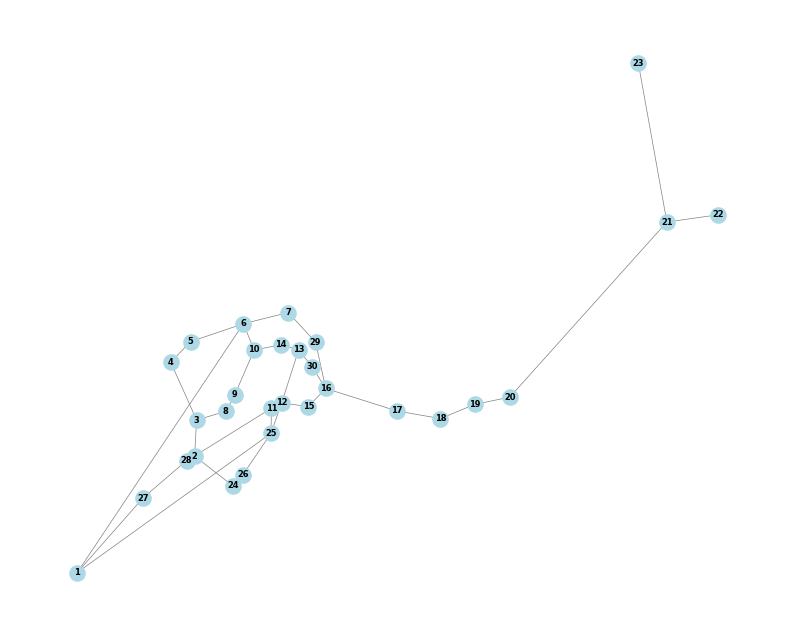

In [15]:
Gi_ = G0.copy()
Gi_.add_edges_from([(1,25),(1,6)])
draw_rotated_graph(Gi_)

In [16]:
import pyomo.environ as pyo
import numpy as np
import math
import ast
import networkx as nx

#Var2Edge
def var2edge(edge_list,y_var):
    return [edge for edge,y_i in zip(edge_list,y_var) if y_i==1]

#Edge2Var
def edge2var(edge_list,edges_):
    ys = [1 if (i,j) in edges_ or (j,i) in edges_ else 0 for (i,j) in edge_list]
    return ys
    
#Travel time function
def travel_time_discrete(t0,alpha,x_ij,C=1000.0):
    return t0*(1 + alpha*(x_ij/C)**4)
    
def travel_time_integral(t0,alpha,x_ij,C=1000.0):
    return t0*(x_ij + 0.2*alpha*(x_ij**5)/(C**4))

#Lower Level Problem
def LLP_problem_solve(G_0, design_edges, 
                      OD_pairs, 
                      demand_paths, 
                      travel_t0, 
                      travel_alpha,
                      display=True,
                      solver_="ipopt"
                      ):

    Gi = G_0.copy() #New Design Network
    Gi.add_edges_from(design_edges) #Add edges to network

    """
    #get flow paths between root and destination
    def get_flow_paths(Gi,r,s):
      paths_ = list(nx.all_simple_paths(Gi,source=r,target=s))
      return [list(zip(path[:-1],path[1:])) for path in paths_]
    flow_paths = {(r,s): get_flow_paths(Gi,r,s)  for (r,s) in OD_pairs}
    """

    # Get flow paths between root and destination
    def get_flow_paths(Gi, r, s, k=5, weight=None):
        """
        Returns up to k shortest simple paths (instead of all simple paths).
        Much more efficient for large graphs.
        """
        gen = nx.shortest_simple_paths(Gi, source=r, target=s, weight=weight)
        paths_ = []
        for i, path in enumerate(gen):
            if i >= k:   # stop after k paths
                break
            paths_.append(list(zip(path[:-1], path[1:])))
        return paths_
    
    # Dictionary of OD flow paths
    flow_paths = {(r, s): get_flow_paths(Gi, r, s, k=5, weight="length") for (r, s) in OD_pairs}

    #Get flow dictionary: paths per (r,s)
    flow_dics = {} #flow dictionaries
    flow_vars_inds = []
    for fi in flow_paths:
      i = 0
      for path in flow_paths[fi]:
        flow_var = f'{fi}_%d'%(i+1)
        flow_dics[flow_var] =  path#store paths
        flow_vars_inds.append(flow_var)
        i+=1
    
    #flow demand rule
    def flow_demand_rule(problem,i,j):
      return sum(problem.f_k[str((i,j))+'_%d'%(ii+1)] for ii in range(len(flow_paths[i,j]))) == demand_paths[i,j]
    
    #flow - overall flow rule [link-path consistency]
    def flow_xij_rule(problem,i,j):
      expr = 0
      for key in flow_dics:
        path = flow_dics[key]
        if (i,j) in path or (j,i) in path:
          expr += problem.f_k[key]
      return expr==problem.x_ij[i,j]
    
    #Create Lower Level Problem
    LL_Trans_Problem = pyo.ConcreteModel()
    LL_Trans_Problem.x_ij = pyo.Var(Gi.edges(),within=pyo.NonNegativeReals) #continuous flow variables
    LL_Trans_Problem.f_k = pyo.Var(flow_vars_inds, within=pyo.NonNegativeReals) #Flow variables are rs-dependent
    LL_Trans_Problem.constraint_flow = pyo.Constraint(OD_pairs,rule=flow_demand_rule)#Flow Demand rule
    LL_Trans_Problem.constraint_flow_xij = pyo.Constraint(Gi.edges(),rule=flow_xij_rule)#Flow Xij rule
    #LL_Trans_Problem.obj = pyo.Objective(expr=sum(LL_Trans_Problem.x_ij[i,j]*travel_time_integral(travel_t0[i,j],travel_alpha[i,j],LL_Trans_Problem.x_ij[i,j]) for (i,j) in LL_Trans_Problem.x_ij))
    LL_Trans_Problem.obj = pyo.Objective(expr=sum(travel_time_integral(travel_t0[i,j],travel_alpha[i,j],LL_Trans_Problem.x_ij[i,j]) for (i,j) in LL_Trans_Problem.x_ij))

    pyo.SolverFactory(solver_).solve(LL_Trans_Problem,tee=display)

    if display:
        print('Number of x-variables: ',len(LL_Trans_Problem.x_ij),'\n')
    x_flows = {}
    for (i,j) in LL_Trans_Problem.x_ij:
        x_flows[i,j] = pyo.value(LL_Trans_Problem.x_ij[i,j])
        if display:
            print(f"x[{i},{j}] =",x_flows[i,j] )

    if display:
        print('Number of f-variables: ',len(LL_Trans_Problem.f_k),'\n')
    f_flows = {}
    for i in LL_Trans_Problem.f_k:
        f_flows[i] = pyo.value(LL_Trans_Problem.f_k[i])
        if display:
            print(f"f[{k}] =", pyo.value(LL_Trans_Problem.f_k[k]))

    L_opt = pyo.value(LL_Trans_Problem.obj)#optimal valur
    
    return L_opt, x_flows,f_flows

<h3>Lower Level Problem - Case Study</h3>

In [17]:
E_e = [(26,4)] #Design edges
L_opt, x_flows, f_flows = LLP_problem_solve(G0, 
                                            design_edges=E_e, 
                                            OD_pairs=OD_pairs, 
                                            demand_paths=demand_paths,
                                            travel_t0=travel_t0,
                                            travel_alpha=travel_alpha,
                                            display=False
                                           )


In [18]:
print("\n--- Results ---")
print("Objective =", L_opt)


--- Results ---
Objective = 2622.024058098539


In [19]:
print('Number of x-variables: ',len(x_flows),'\n')
for (i,j) in x_flows:
    print(f"x[{i},{j}] =",x_flows[i,j] )

Number of x-variables:  35 

x[13,30] = 1905.105825416387
x[3,4] = 572.1374934147174
x[16,29] = 2029.662505510621
x[16,17] = 2657.199999999999
x[7,29] = 2060.3374931134304
x[12,13] = 621.0619547219183
x[21,22] = 660.5999999999997
x[8,9] = 752.2438728147308
x[12,25] = 90.80000035480192
x[17,18] = 1412.1999999999996
x[2,11] = 1683.2186339105883
x[27,28] = 2036.999999999999
x[25,26] = 90.79999964499817
x[13,14] = 1646.0438723979598
x[1,27] = 2036.999999999999
x[18,19] = 1412.1999999999996
x[4,5] = 612.1374929500173
x[5,6] = 1372.9374932558505
x[12,15] = 1114.556681162215
x[4,26] = 90.79999964499817
x[9,10] = 887.8438726354668
x[10,14] = 1940.243872187834
x[19,20] = 660.5999999999997
x[6,7] = 1784.7374937920904
x[11,25] = 1.3732186868774601e-06
x[15,16] = 1673.7566811286613
x[2,28] = 2036.999999999999
x[6,10] = 1811.8000007119367
x[16,30] = 1536.4941748200665
x[21,23] = 0.0
x[20,21] = 660.5999999999997
x[3,8] = 742.2438729142518
x[2,3] = 1314.3813660321612
x[11,12] = 1683.218633255015
x[2,

In [20]:
#--------------------------------------------------
def Upper_Level_Problem_obj_func(G0, 
                                y_vars=None, 
                                OD_pairs=OD_pairs, 
                                demand_paths=demand_paths,
                                travel_t0=travel_t0,
                                travel_alpha=travel_alpha,
                                cost_weights = cost_weights,
                                budget = 100,
                                penalty_factor = 1e9,
                                calib = CALIB,
                                complete_edge_vars=complete_edge_list,
                                free_design = True,
                                node_data = node_data,
                                display=False):
    
    E_e = [edge for edge,y_i in zip(complete_edge_vars,y_vars) if y_i== 1]#new design variables
    #print('E',E_e)
    #-- Solve the LLP problem
    L_opt, x_flows, f_flows = LLP_problem_solve(G0, 
                                            design_edges=E_e, 
                                            OD_pairs=OD_pairs, 
                                            demand_paths=demand_paths,
                                            travel_t0=travel_t0,
                                            travel_alpha=travel_alpha,
                                            display=display
                                           )
    #Solve the Objective Function
    obj_value = sum([x_flows[i,j]*travel_time_discrete(travel_t0[i,j],travel_alpha[i,j],x_flows[i,j]) for (i,j) in x_flows])
    penalty = max(0,sum([cost_weights[i,j] for (i,j) in E_e])-budget*calib)
    #print('penalty:', penalty)
    pure_cost = obj_value
    obj_value += penalty_factor*penalty
    if not free_design:
        Gi_ = G0.copy()
        Gi_.add_edges_from(E_e)
        cnt, inter = count_intersections_basic(Gi_, node_data)
        obj_value += cnt*penalty_factor*0.1
    
    return obj_value, x_flows, pure_cost



#------------------------------------------------ (Test Example) ----
y_vars = edge2var(complete_edge_list,[])
#---------------------------------------------------------------------
obj_value,x_flows,pure_cost = Upper_Level_Problem_obj_func(G0, 
                                y_vars=y_vars, 
                                OD_pairs=OD_pairs, 
                                demand_paths=demand_paths,
                                travel_t0=travel_t0,
                                travel_alpha=travel_alpha,
                                budget = Budget,
                                cost_weights = cost_weights,
                                complete_edge_vars=complete_edge_list,
                                display=False,
                                free_design = optim_free_design,
                                node_data = node_data)
                                         
print('\n\nUpper problem value:', obj_value)    



Upper problem value: 5576.8752741157095


<h2>Ant Colony Optimisation</h2>

In [21]:
import numpy as np
import random
import copy
import time

def aco_upper_solver(G0,
                     complete_edge_list,
                     OD_pairs,
                     demand_paths,
                     travel_t0,
                     travel_alpha,
                     cost_weights,
                     budget=100,
                     calib=1.0,
                     penalty_factor=1e9,
                     alpha=aco_alpha,
                     beta=aco_beta,
                     rho=aco_rho,
                     Q=aco_Q,
                     num_ants=10,
                     max_iter=50,
                     display=False,
                    free_design = optim_free_design,
                     node_data = node_data):
    """
    Ant Colony Optimisation (ACO) solver for the Upper Level Problem (ULP).
    
    Parameters
    ----------
    G0 : networkx.Graph
        Base graph.
    complete_edge_list : list
        All possible edges (tuples).
    OD_pairs, demand_paths : dict
        Precomputed OD data.
    travel_t0, travel_alpha : dict
        Travel time parameters.
    cost_weights : dict
        Edge construction costs.
    budget : float
        Total available budget.
    calib : float
        Calibration factor for budget scaling.
    penalty_factor : float
        Penalty for infeasible solutions.
    alpha, beta : float
        Pheromone and heuristic influence.
    rho : float
        Pheromone evaporation rate.
    Q : float
        Pheromone deposit constant.
    num_ants : int
        Number of ants per iteration.
    max_iter : int
        Maximum iterations.
    display : bool
        Whether to display progress.
    """

    # === INITIALISE PHEROMONES AND HEURISTIC INFORMATION ===
    tau = {e: 1.0 for e in complete_edge_list}  # pheromone level
    eta = {e: 1.0 / (cost_weights[e] + 1e-9) for e in complete_edge_list}  # heuristic info

    best_edges, best_obj, best_flows = None, float("inf"), None

    iter_history = {
        "edges": [],
        "obj": [],
        "flows": []
    }

    for it in range(max_iter):
        all_solutions = []
        all_objs = []
        all_flows = []

        # === Each ant constructs a candidate network ===
        for ant in range(num_ants):
            E_s = []
            total_cost = 0.0

            while total_cost < budget * calib:
                # Candidate edges not yet added
                remaining_edges = [e for e in complete_edge_list
                                   if e not in E_s and e not in G0.edges()]

                # Filter feasible edges (respect budget)
                feas_edges = [e for e in remaining_edges
                              if total_cost + cost_weights[e] <= budget * calib]
                if not feas_edges:
                    break

                # --- Compute probability distribution P(e) ---
                pheromone_scores = np.array([tau[e] ** alpha * eta[e] ** beta for e in feas_edges])
                total_pheromone = pheromone_scores.sum()
                if total_pheromone <= 0:
                    # Avoid division by zero
                    P = np.ones(len(feas_edges)) / len(feas_edges)
                else:
                    P = pheromone_scores / total_pheromone

                # --- Roulette-wheel selection (FIX: choose index) ---
                idx = np.random.choice(len(feas_edges), p=P)
                next_edge = feas_edges[idx]

                # --- Add edge and update total cost ---
                E_s.append(next_edge)
                total_cost += cost_weights[next_edge]

            # === Evaluate ant's constructed network ===
            y_trial = [1 if edge in E_s else 0 for edge in complete_edge_list]

            obj_val, flows, pure_cost = Upper_Level_Problem_obj_func(
                G0,
                y_vars=y_trial,
                OD_pairs=OD_pairs,
                demand_paths=demand_paths,
                travel_t0=travel_t0,
                travel_alpha=travel_alpha,
                cost_weights=cost_weights,
                budget=budget,
                penalty_factor=penalty_factor,
                calib=calib,
                complete_edge_vars=complete_edge_list,
                display=False,
                free_design = optim_free_design,
                node_data = node_data
            )

            # Store results
            all_solutions.append(E_s)
            all_objs.append(obj_val)
            all_flows.append(flows)

            # Track global best
            if obj_val < best_obj:
                best_obj = obj_val
                best_edges = E_s.copy()
                best_flows = flows

        # === PHEROMONE UPDATE ===
        # Evaporation
        for e in tau:
            tau[e] = (1 - rho) * tau[e]

        # Deposit pheromone based on solution quality
        for i, E_s in enumerate(all_solutions):
            delta_tau = Q / (all_objs[i] + 1e-9)
            for e in E_s:
                tau[e] += delta_tau


        iter_history["edges"].append(best_edges.copy())
        iter_history["flows"].append(best_flows.copy())
        iter_history["obj"].append(best_obj)

        # === Display progress ===
        if display:
            print(f"[ACO] Iter {it+1:03d}/{max_iter}: "
                  f"BestObj={best_obj:.4f}, MeanObj={np.mean(all_objs):.4f}")

            # Optional graph drawing
            Gi = G0.copy()
            if best_edges:
                Gi.add_edges_from(best_edges)
            try:
                draw_rotated_graph(Gi, edge_flows=best_flows)
            except Exception:
                pass

    # === Return final best ===
    return best_edges, best_obj, best_flows, iter_history


[ACO] Iter 001/1: BestObj=5500002115.1083, MeanObj=6300002553.7088


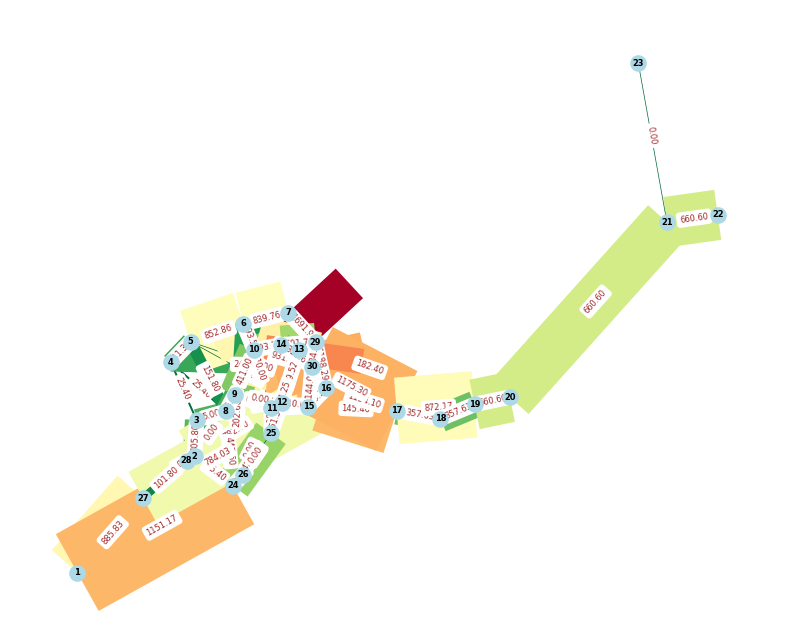

In [22]:

aco_best_edges_list   = []
aco_best_obj_list     = []
aco_best_flows_list   = []
aco_iter_history_list = []
elapsed_aco_list      = []

start_aco = time.time()

aco_best_edges, aco_best_obj, aco_best_flows, aco_iter_history = aco_upper_solver(
    G0,
    complete_edge_list,
    OD_pairs=OD_pairs,
    demand_paths=demand_paths,
    travel_t0=travel_t0,
    travel_alpha=travel_alpha,
    cost_weights=cost_weights,
    budget=Budget,
    calib=CALIB,
    num_ants=optim_pop_size,
    max_iter=optim_max_iter,
    alpha=aco_alpha,
    beta=aco_beta,
    rho=aco_rho,
    Q=aco_Q,
    display=True,
    free_design = optim_free_design,
    node_data = node_data
)

stop_aco = time.time()
elapsed_aco = (stop_aco - start_aco)/60

# --- Store results from this run ---
elapsed_aco_list.append(elapsed_aco)
aco_best_edges_list.append(aco_best_edges.copy())
aco_best_obj_list.append(aco_best_obj)
aco_best_flows_list.append(aco_best_flows.copy())
aco_iter_history_list.append(aco_iter_history.copy())



In [23]:
print("\nACO Chosen edges:", aco_best_edges)
print("Final objective:", aco_best_obj)
print(f"Elapsed time: {elapsed_aco:.4f} minutes")


ACO Chosen edges: [(8, 24), (24, 26), (11, 24), (6, 11), (15, 30), (11, 15), (17, 30), (6, 19), (9, 11), (6, 24), (4, 8), (14, 29), (9, 12), (15, 17), (10, 30), (17, 19), (5, 16), (15, 27), (5, 15), (3, 16), (29, 30), (2, 8), (5, 8), (13, 25), (1, 24), (4, 30), (24, 25), (14, 30)]
Final objective: 5500002115.108338
Elapsed time: 0.1595 minutes


<h3>ACO Multiple Runs</h3>

In [24]:
# ===============================================================
# === MULTIPLE RUNS: ANT COLONY OPTIMISATION ====================
# ===============================================================


for i in range(n_runs):
    print(f'ACO run number {i+1}...')
    # ------------------------------------------------------------
    start_aco = time.time()
    
    aco_best_edges, aco_best_obj, aco_best_flows, aco_iter_history = aco_upper_solver(
        G0,
        complete_edge_list,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        budget=Budget,
        calib=CALIB,
        num_ants=optim_pop_size,
        max_iter=optim_max_iter,
        alpha=aco_alpha,
        beta=aco_beta,
        rho=aco_rho,
        Q=aco_Q,
        display=False,
        free_design = optim_free_design,
        node_data = node_data
    )
    
    stop_aco = time.time()
    elapsed_aco = (stop_aco - start_aco) / 60.0  # minutes
    
    # --- Store results from this run ---
    elapsed_aco_list.append(elapsed_aco)
    aco_best_edges_list.append(aco_best_edges.copy())
    aco_best_obj_list.append(aco_best_obj)
    aco_best_flows_list.append(aco_best_flows.copy())
    aco_iter_history_list.append(aco_iter_history.copy())
    
    # --- Display per-run summary ---
    print("\n=== ACO Search Result ===")
    print("Best edges selected:", aco_best_edges)
    print("Best objective value:", aco_best_obj)
    print(f"ACO Elapsed Time: {elapsed_aco:.4f} minutes\n")

print("ACO search multiple runs complete...")


ACO run number 1...

=== ACO Search Result ===
Best edges selected: [(12, 30), (16, 28), (10, 29), (8, 11), (24, 26), (7, 13), (9, 29), (5, 20), (8, 26), (13, 29), (8, 25), (11, 28), (4, 28), (5, 11), (14, 30), (6, 13), (19, 29), (16, 20), (9, 17), (18, 28), (4, 9), (10, 12), (6, 29), (3, 10), (8, 27), (2, 26), (3, 28), (12, 16)]
Best objective value: 5000002478.152169
ACO Elapsed Time: 0.1679 minutes

ACO search multiple runs complete...


<h2>Saving Results</h2>

In [25]:
from joblib import dump, load
from datetime import datetime

timestamp = datetime.now().strftime("%d_%m_%Y_%H_%M_%S")
aco_title = f"../../output/results/constrained/rv1/aco_results_{timestamp}.joblib"

In [26]:
# ===============================================================
# === SAVE ACO RESULTS ==========================================
# ===============================================================

aco_solution_pack = {
    "optim_name": "ACO",
    "desc": "no intersection to objective function",
    "n_sol": n_runs + 1,
    "optim_time": elapsed_aco_list,
    "settings": [{
        "num_ants": optim_pop_size,
        "max_iter": optim_max_iter,
        "alpha": aco_alpha,
        "beta": aco_beta,
        "rho": aco_rho,
        "Q": aco_Q,
        "free_design":optim_free_design
    }],
    "solutions": aco_best_edges_list,
    "obj_vals": aco_best_obj_list,
    "flows": aco_best_flows_list,
    "iter_history": aco_iter_history_list
}



dump(aco_solution_pack, aco_title)
print(f"{aco_title} saved....")

../../output/results/constrained/rv1/aco_results_27_02_2026_03_52_31.joblib saved....


In [27]:
print("\n=== ACO MULTI-RUN SUMMARY ===")
print(f"Average objective: {np.mean(aco_best_obj_list):.4f}")
print(f"Best objective: {np.min(aco_best_obj_list):.4f}")
print(f"Average runtime: {np.mean(elapsed_aco_list):.4f} minutes")
print(f"Std. deviation of objective: {np.std(aco_best_obj_list):.4f}")


=== ACO MULTI-RUN SUMMARY ===
Average objective: 5250002296.6303
Best objective: 5000002478.1522
Average runtime: 0.1637 minutes
Std. deviation of objective: 249999818.4781
